In [1]:
import baspy as bp
# baspy is a tool used at BAS for keeping track of the CMIP6 data

In [2]:
ls /gws/pw/j05/cop26_hackathons/bristol/project10/utci_projections_1deg/

BCC-CSM2-MR/  CMCC-ESM2/  HadGEM3-GC31-LL/


In [3]:
from pathlib import Path
import xarray as xr
utci_path = Path("/gws/pw/j05/cop26_hackathons/bristol/project10/utci_projections_1deg/")

file_nested_list = []
model_list = []
scenario_list = []
runid_list = []


for model_path in utci_path.glob("*"):
    model = str(model_path).split('/')[-1]
    model_list.append(model)
    file_nested_list.append([])
    for scenario_path in model_path.glob("*"):
        scenario = str(scenario_path).split('/')[-1]
        scenario_list.append(scenario)
        file_nested_list[-1].append([])
        for runid_path in scenario_path.glob("*"):
            runid = str(runid_path).split('/')[-1]
            runid_list.append(runid)
            
            print(model, scenario, runid)
            files = list(runid_path.glob("*"))
            file_nested_list[-1][-1].append(files)

            catlg_tas = bp.catalogue(dataset="cmip6", Experiment=scenario_list, CMOR='Amon', Var='tas', Model=model_list, RunID=runid_list)
            catlg_sftlf = bp.catalogue(dataset="cmip6", Var='sftlf', Model=model_list,).head(1)
            catlg_areacella = bp.catalogue(dataset="cmip6", Var='areacella', Model=model_list,).head(1)
            
            ds_tas = xr.open_mfdataset(bp.get_files(catlg_tas), combine='by_coords')
            ds_sftlf = xr.open_dataset(bp.get_files(catlg_sftlf)[0])
            ds_areacella = xr.open_dataset(bp.get_files(catlg_areacella)[0])
            
            gmst = ds_tas.tas.weighted(ds_areacella.areacella).mean(['lat', 'lon'])
            
            
        break
    break


HadGEM3-GC31-LL historical r1i1p1f3
Updating cached catalogue...
catalogue memory usage (MB): 18.146445999999997


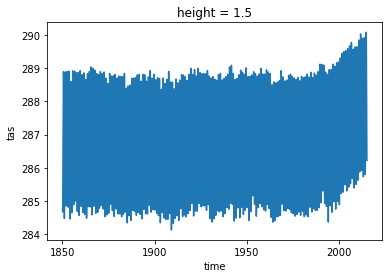

In [4]:
gmst.plot()

In [6]:
import regionmask

In [11]:
regionmask.defined_regions.srex.mask(ds_tas.lat, ds_tas.lon)

<xarray.DataArray 'region' (lat: 192, lon: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan,  6., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
  * lon      (lon) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38

In [13]:
from pathlib import Path
import xarray as xr
import regionmask
utci_path = Path("/gws/pw/j05/cop26_hackathons/bristol/project10/utci_projections_1deg/")

file_nested_list = []
model_list = []
scenario_list = []
runid_list = []


for model_path in utci_path.glob("*"):
    model = str(model_path).split('/')[-1]
    model_list.append(model)
    file_nested_list.append([])
    for scenario_path in model_path.glob("*"):
        scenario = str(scenario_path).split('/')[-1]
        scenario_list.append(scenario)
        file_nested_list[-1].append([])
        for runid_path in scenario_path.glob("*"):
            runid = str(runid_path).split('/')[-1]
            runid_list.append(runid)
            
            print(model, scenario, runid)
            files = list(runid_path.glob("*"))
            file_nested_list[-1][-1].append(files)

            catlg_tas = bp.catalogue(dataset="cmip6", Experiment=scenario_list, CMOR='Amon', Var='tas', Model=model_list, RunID=runid_list)
            catlg_sftlf = bp.catalogue(dataset="cmip6", Var='sftlf', Model=model_list,).head(1)
            catlg_areacella = bp.catalogue(dataset="cmip6", Var='areacella', Model=model_list,).head(1)
            
            ds_tas = xr.open_mfdataset(bp.get_files(catlg_tas), combine='by_coords')
            ds_sftlf = xr.open_dataset(bp.get_files(catlg_sftlf)[0])
            ds_areacella = xr.open_dataset(bp.get_files(catlg_areacella)[0])
            
            gmst = ds_tas.tas.weighted(ds_areacella.areacella).mean(['lat', 'lon'])
            
            # Region mask
            mask = regionmask.defined_regions.srex.mask(ds_tas.lat, ds_tas.lon)
            
            ds_tas
        break
    break


HadGEM3-GC31-LL historical r1i1p1f3


In [14]:
mask

<xarray.DataArray 'region' (lat: 192, lon: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan,  6., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
  * lon      (lon) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38